### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [11]:
data = pd.read_csv('coupons.csv')

In [12]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# 2. Investigate the dataset for missing or problematic data.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

# 3. Decide what to do about your missing data -- drop, replace, other...

The data has 12684 observation wih 26 features. However, "car" had largest 'null' values. therefore, option A could be to completely drop "car" feature for the analysis. this may significantly the analysis. therefore, next option could be ignore all the observations with 'null' values, that would result in significant reduction in total observation to 108. 

therefore, all the unknown / "null" values are replaces for 0 , to undertake further analysis

In [14]:
#data.info()
df = data.fillna(0)
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


# 4. What proportion of the total observations chose to accept the coupon? 



## Total observation: number of row in the original data
## coupon_accepted: count of number of observations where  coupons were accepted

In [15]:
total_observations = df.loc[df["Y"]].shape[0]
coupon_accepted = df.loc[df["Y"]==1].shape[0]
acceptance_proportion = coupon_accepted / total_observations 
print(acceptance_proportion)

0.5684326710816777


# 5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:xlabel='coupon', ylabel='Count'>

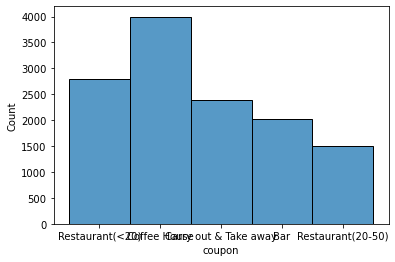

In [19]:
sns.histplot( x= "coupon", data= df)

# 6. Use a histogram to visualize the temperature column.

## the plot below show possible increase in coupon distribution with increase in temperature. the coupon acceptance count also increase with temperature. However, the ratio of "coupons accepted" to "coupons not accepted" remains significantly higher.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

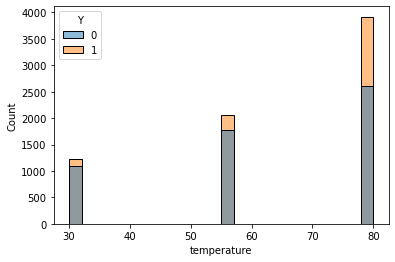

In [20]:
sns.histplot(df, x = 'temperature', hue="Y")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


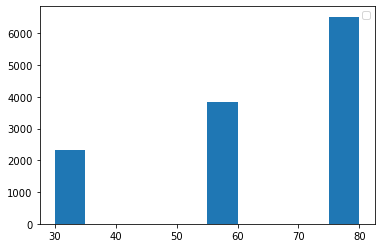

In [21]:
plt.hist(df["temperature"])
plt.legend()

In [22]:
px.histogram(df, x = 'temperature')

# **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [23]:
#Bar_data = df.query("coupon == 'Bar'")
Bar_data = df[(df["coupon"] == 'Bar')]
Bar_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [24]:
Bar_obs = Bar_data.shape[0]
Bar_Y1 = Bar_data.loc[data["Y"]==1].shape[0]
bar_acceptance = Bar_Y1 / Bar_obs
bar_acceptance

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


## most of the data in the datafile is categorical. These were modified by replacing appropriate numerical value and converting data type from 'str' to int. 

In [25]:
#Bar_less_3 = Bar_data[Bar_data["Bar"]== '1~3'].shape[0]
#Bar_less_1 = Bar_data[Bar_data["Bar"] == 'less1'].shape[0]
#Bar_less = Bar_data[(Bar_data["Bar"]== '1~3') or (Bar_data["Bar"]== 'less1')]
Bar_less = Bar_data.query("Bar == 'less1' or Bar == '1~3' ").shape[0]
Bar_less
Bar_obs
Acceptance_Bar_less = Bar_less / Bar_obs
print(Acceptance_Bar_less)

0.47942488844819037


In [26]:
Bar_less1 = Bar_data.query("Bar == 'less1' or Bar == '1~3' and Y == '1' ")
(Bar_less1.shape[0]) / Bar_obs

0.2825979176995538

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [27]:
Bar_data['age'] = Bar_data['age'].replace ({'below21': '20', '50plus': "51"}).astype('int')
#df2 = df1.astype('int')
Bar_data['Bar'] = Bar_data['Bar'].replace({'never':'0', 'less1': '0', '1~3':'1','gt8':'9','4~8':'4'}).astype('int')
numero = Bar_data.query("Bar >=1 and age>25").shape[0]
denome = df.shape[0]
Driver_25_Bar = numero/denome
print(Driver_25_Bar)

0.033112582781456956


/var/folders/n6/3wwzwvcs3gb87szxh3j04ync0000gn/T/ipykernel_53421/610610928.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/n6/3wwzwvcs3gb87szxh3j04ync0000gn/T/ipykernel_53421/610610928.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [20]:
Bar_data['passanger'].unique()
numerator = Bar_data.query("Bar >=1 and passanger == 'Alone' or passanger == 'Friend(s)' or passanger == 'Partner' and occupation !='Farming Fishing & Forestry' ").shape[0]
acceptance = numerator / denome
acceptance

0.07623777988016399

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [21]:
a = Bar_data.query("Bar >=1 and passanger != 'Kid(s)' and maritalStatus != 'Widowed' ").shape[0]
bar_noKid_noWidowed = a / denome
bar_noKid_noWidowed

0.043440555029959006

In [22]:
b = Bar_data.query("Bar >=1 and age <30 ").shape[0]
bar_Age_less30 = b / denome
bar_Age_less30

0.027199621570482498

## for the income, the range can be dealt with either considering min / max / average of range to substitute for categories specified. Currently, max value of range is considered for analysis, although this approach may by always be correct. 

In [437]:
Bar_data['income'] = Bar_data['income'].replace({'$37500 - $49999' : '49' , '$62500 - $74999': '74', '$12500 - $24999': '24'
                                                 ,'$75000 - $87499': '87', '$50000 - $62499' : '62', '$25000 - $37499': '37'
                                                 ,'$100000 or More': '101', '$87500 - $99999': '99', 'Less than $12500': 
                                                     125}).astype('int')
Bar_data['RestaurantLessThan20'] = Bar_data['RestaurantLessThan20'].replace({'never':'0', 'less1': '0', '1~3':'1','gt8':'9','4~8':'4'}).astype('int')
c = Bar_data.query("RestaurantLessThan20 >=4 and income <50").shape[0]
cheap_res_50k = c/denome
cheap_res_50k

/var/folders/n6/3wwzwvcs3gb87szxh3j04ync0000gn/T/ipykernel_45090/1689808199.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/n6/3wwzwvcs3gb87szxh3j04ync0000gn/T/ipykernel_45090/1689808199.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.021365499842321035

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [23]:
# Based on the observation, close to 50% received Bar coupon. and only 30% of them visited Bar.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [24]:
#data['coupon'].unique()
res1 = data[data['coupon']== 'Restaurant(<20)'].shape[0]
res1

2786

In [528]:
df['income'] = df['income'].replace({'$37500 - $49999' : '49' , '$62500 - $74999': '74', '$12500 - $24999': '24'
                                                 ,'$75000 - $87499': '87', '$50000 - $62499' : '62', '$25000 - $37499': '37'
                                                 ,'$100000 or More': '101', '$87500 - $99999': '99', 'Less than $12500': 
                                                     125}).astype('int')
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].replace({'never':'0', 'less1': '0', '1~3':'1','gt8':'9','4~8':'4'}).astype('int')
df['Restaurant20To50'] = df['Restaurant20To50'].replace({'never':'0', 'less1': '0', '1~3':'1','gt8':'9','4~8':'4'}).astype('int')
df['CoffeeHouse'] = df['CoffeeHouse'].replace({'never':'0', 'less1': '0', '1~3':'1','gt8':'9','4~8':'4'}).astype('int')
df['Restaurant20To50'].unique()

array([1, 0, 9, 4])

In [28]:
px.histogram(df, x = 'income', y = 'Y', color = "gender"  )

## looking at the correlations, most of the features does not show significantly positive or negative correlations. However, these correlations may not necessarily means having a strong positive or negative provide benefit to the analysis. It should be evaluated on case to case basis. 

In [532]:
df.corr()

,temperature,has_children,income,CoffeeHouse,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.019716,-0.039910,-0.013823,0.032935,-0.017414,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,-0.029616,0.030442,-0.050351,-0.013777,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
income,-0.039910,-0.029616,1.000000,0.041930,0.087184,0.029650,NaN,0.004803,0.002189,0.011549,-0.011549,-0.013794
CoffeeHouse,-0.013823,0.030442,0.041930,1.000000,0.324151,0.237523,NaN,-0.003060,0.001707,0.007571,-0.007571,0.053320
RestaurantLessThan20,0.032935,-0.050351,0.087184,0.324151,1.000000,0.430369,NaN,-0.008956,-0.010343,-0.009571,0.009571,0.038383
Restaurant20To50,-0.017414,-0.013777,0.029650,0.237523,0.430369,1.000000,NaN,-0.012138,-0.009079,-0.000891,0.000891,0.057976
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,0.004803,-0.003060,-0.008956,-0.012138,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,0.002189,0.001707,-0.010343,-0.009079,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,0.011549,0.007571,-0.009571,-0.000891,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570


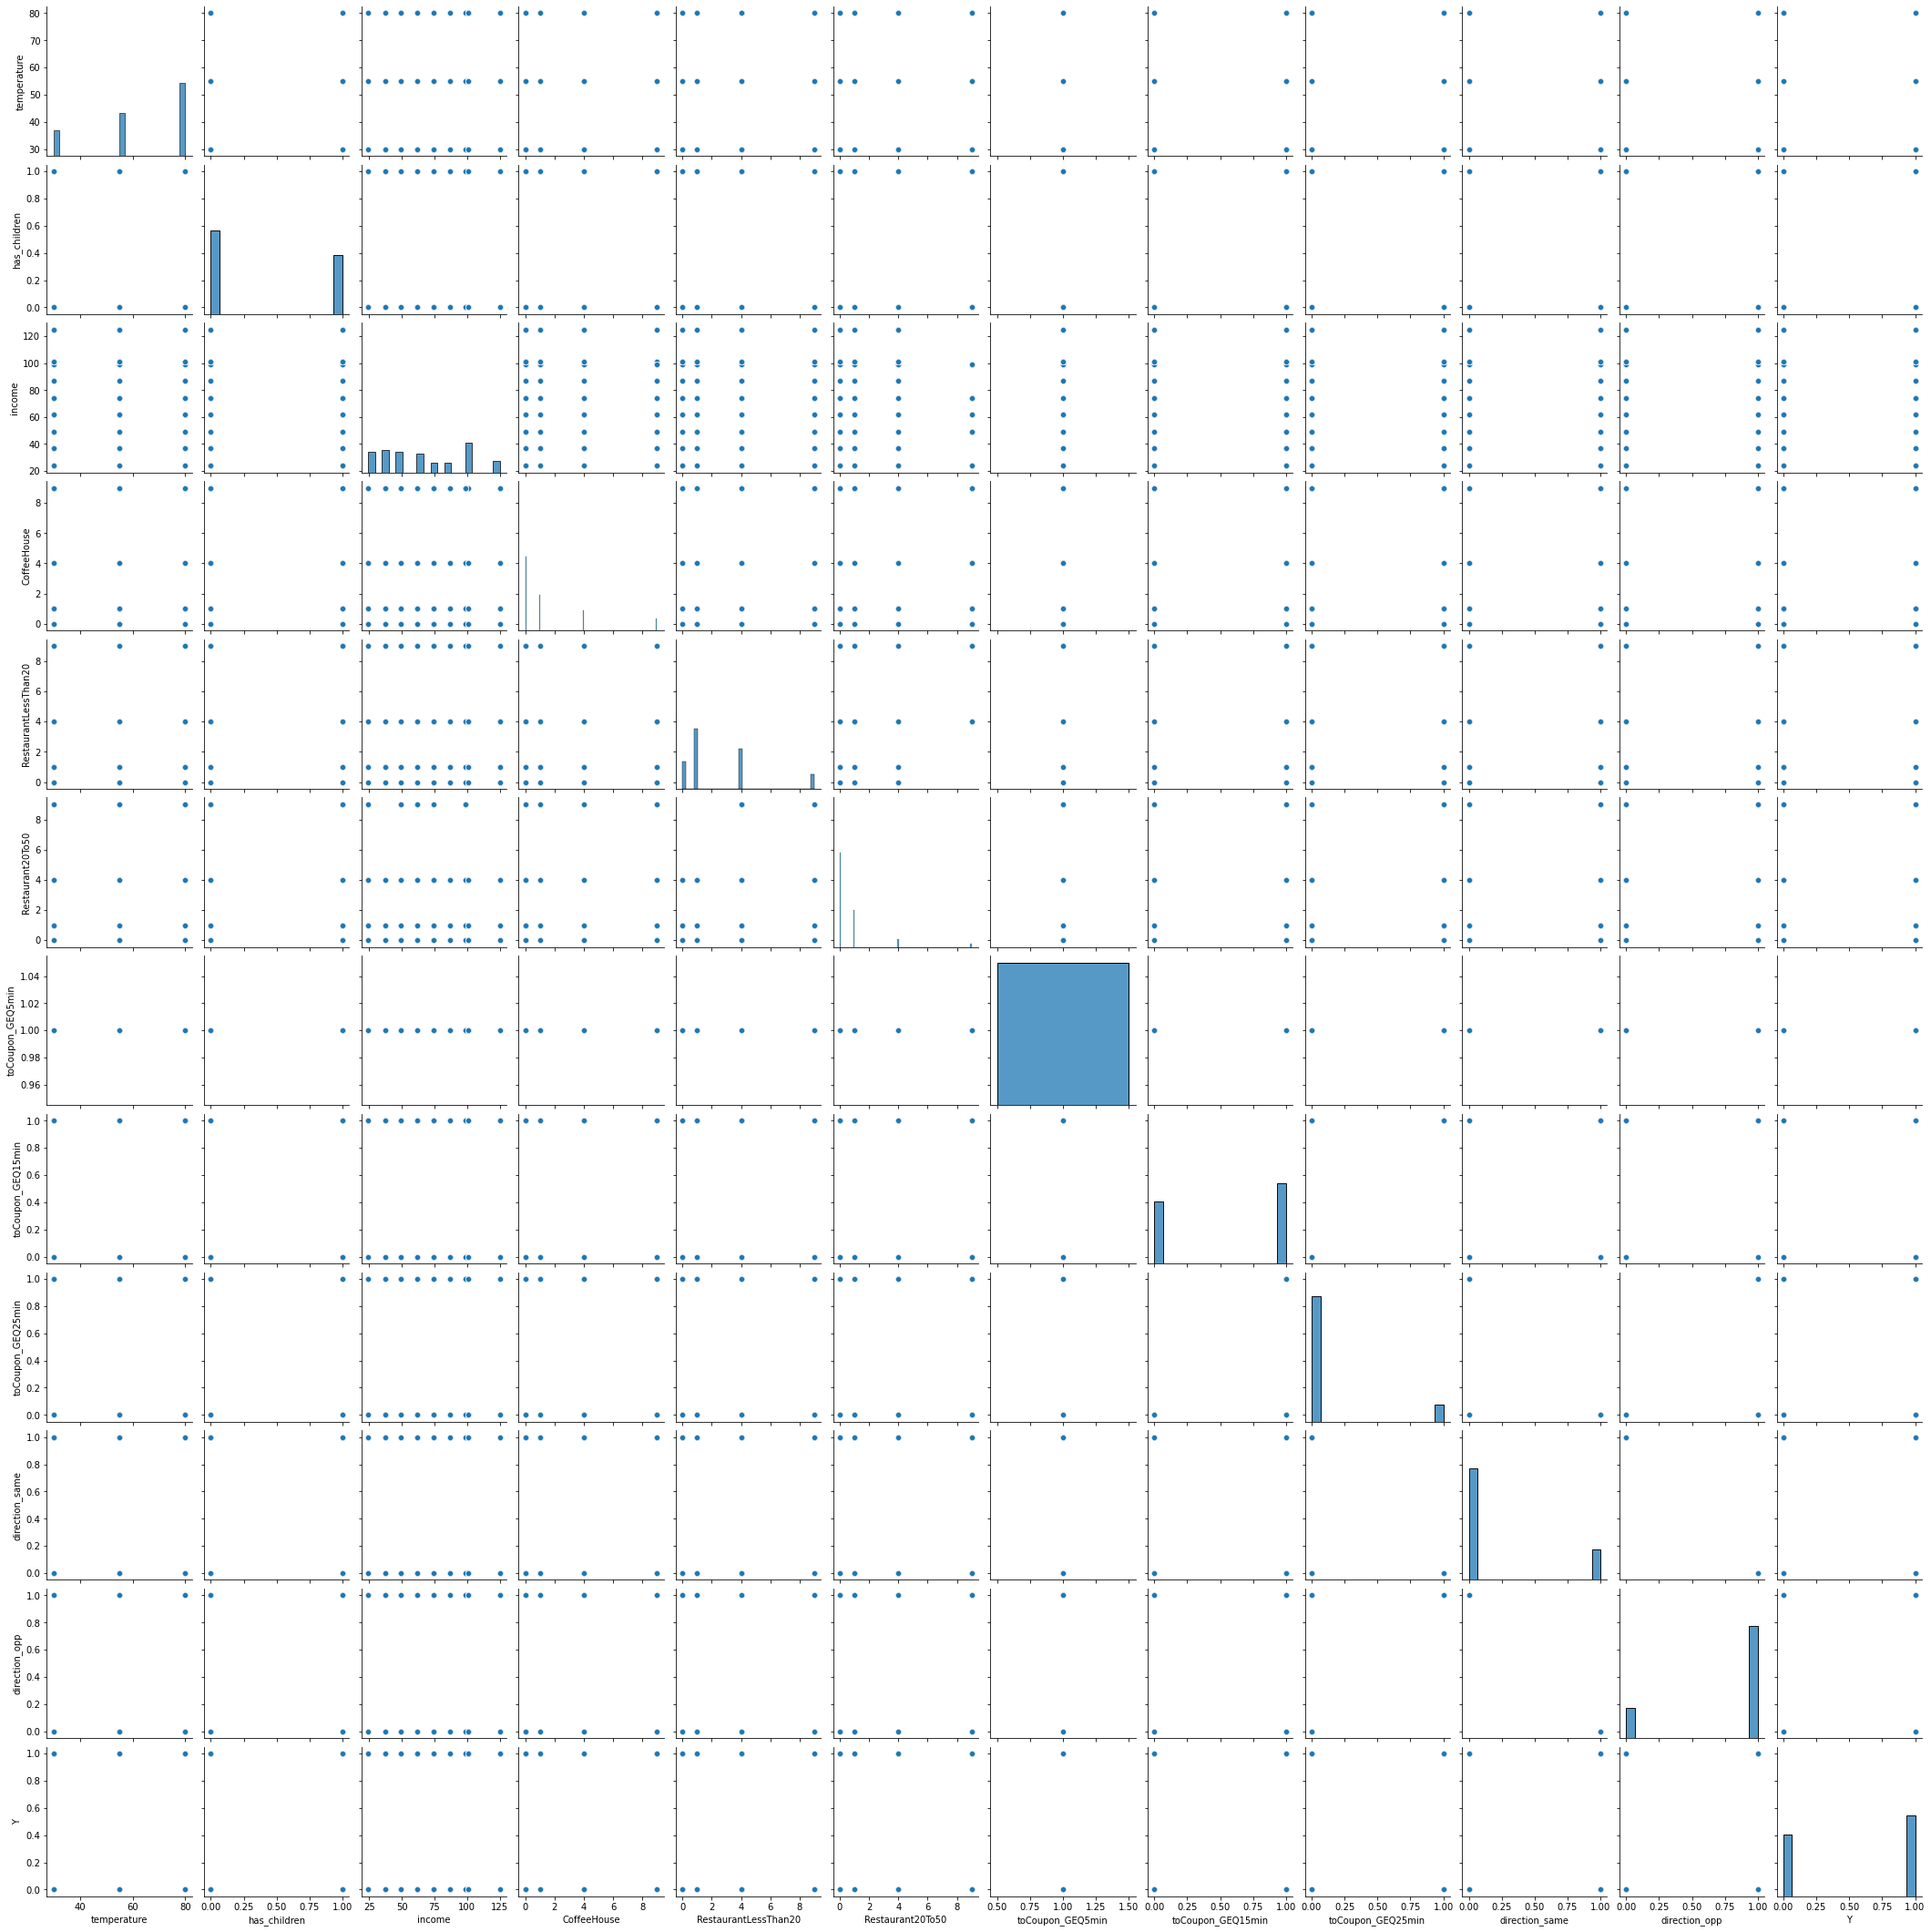

In [537]:
sns.pairplot(df)

<AxesSubplot:xlabel='income', ylabel='Count'>

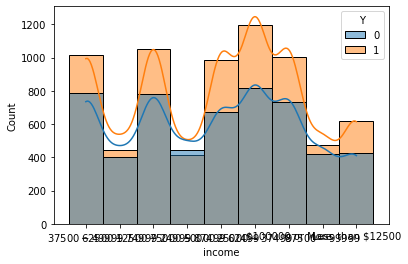

In [30]:
sns.histplot(df, x = 'income', hue = "Y", kde= True)

<AxesSubplot:xlabel='CoffeeHouse', ylabel='Count'>

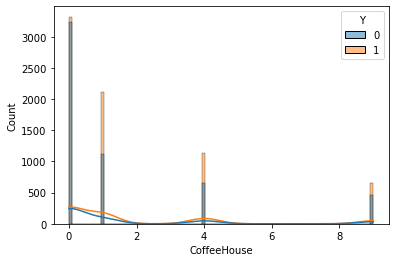

In [546]:
sns.histplot(df, x = 'CoffeeHouse', hue = "Y", kde= True)

<AxesSubplot:xlabel='RestaurantLessThan20', ylabel='Count'>

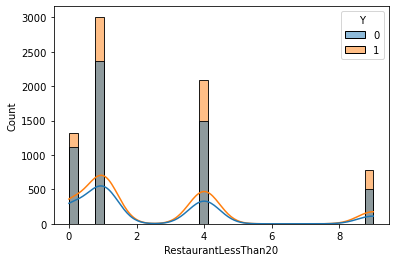

In [547]:
sns.histplot(df, x = 'RestaurantLessThan20', hue = "Y", kde= True)

<AxesSubplot:xlabel='Restaurant20To50', ylabel='Count'>

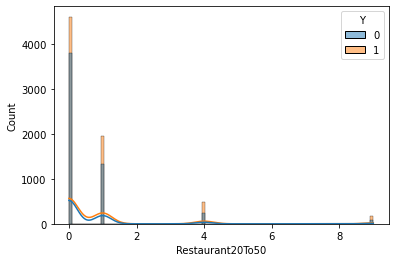

In [548]:

sns.histplot(df, x = 'Restaurant20To50', hue = "Y", kde= True)


<AxesSubplot:xlabel='gender', ylabel='Count'>

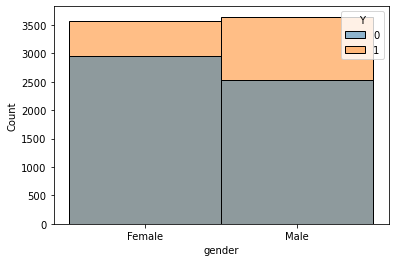

In [560]:
sns.histplot(df, x = 'gender', hue = "Y")